In [2]:
# importando bibliotecas

from gurobipy import GRB
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# criando os dados

# vértices
N = 21

# coordenadas
np.random.seed(1)
X = list(np.random.random(N) * 100)
Y = list(np.random.random(N) * 100)

# demandas
demanda = list(np.random.randint(low=10, high=50, size=N))

In [4]:
Color = { 
    0 : 'blue',
    1 : 'orange',
    2 : 'green',
    3 : 'red',
    4 : 'purple',
    5 : 'brown',
    6 : 'pink',
    7 : 'gray',
    8 : 'olive',
    9 : 'cyan',
    10 : 'yellow',
    11 : 'violet',
    12 : 'lime',
    13 : 'azure',
    14 : 'gold',
    15 : 'tan'
}

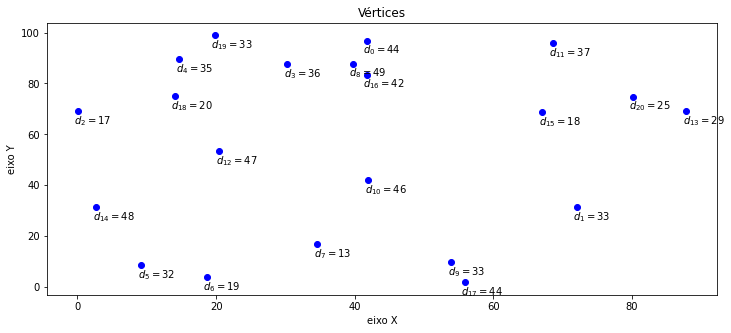

In [5]:
# gráfico das coordenadas com suas respectivas demandas

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))

plt.xlabel("eixo X")
plt.ylabel("eixo Y")
plt.title("Vértices")
plt.show()

In [6]:
# definindo os conjuntos

# vértices
vertices = [i for i in range(N)]

# localizações
localizacoes = [i for i in vertices]

# arcos
arcos = [(i,j) for i in vertices for j in localizacoes]

# número máximo de localizações
p = 5

# matriz de distâncias
distancia = {(i,j) : 
             np.hypot(X[i]-X[j],Y[i]-Y[j]) for i in vertices for j in localizacoes
            }

# P-median problem

Conjuntos e paramêtros

- vertices: conjunto de vértices que representam um cliente, $I = \{1, \ldots, n \}$.

- localizacoes: conjunto de vértices que representam candidatos a localizações, $J = \{1, \ldots, m \}$.

- arcos: conjunto das arestas entre cada cliente e localização $A = \{ (i,j) \in I \times J \}$.

- p: número de instalações a se utilizar.

- Variáveis de decisão:

$x_{ij} = 1$ se p vértice $i$ é servido pela localização $j$, $0$, caso contrário.

$y_j = 1$, se a instalação é a localização $j$, $0$, caso contrário.

$
\begin{align*}
\min \ & \sum_{i \in I} \sum_{j \in J} c_{ij} x_{ij} d_i \\
& \sum_{i \in I} x_{ij} = 1 \ \forall j \in J \\
& \sum_{j \in J} y_j = p \\
& x_{ij} - y_j \leq 0, \ \forall j \in J \ i \in I \\
& x_{ij} \in \mathbb{B}^{|I \times J|} \\
& y_{j} \in \mathbb{B}^{|I|}
\end{align*}
$

In [7]:
# formulação p-median

# modelo
model = Model('P-median')

#variáveis
x = model.addVars(arcos, vtype=GRB.BINARY, name='x')
y = model.addVars(localizacoes, vtype=GRB.BINARY, name='y')

# função objetivo
model.setObjective(quicksum(distancia[i,j]*x[i,j] for i,j in arcos),GRB.MINIMIZE)

# restrições
model.addConstrs(quicksum(x[i,j] for j in localizacoes) == 1 for i in vertices)
model.addConstr(quicksum(y[j] for j in localizacoes) <= p)
model.addConstrs(x[i,j] - y[j] <= 0 for i in vertices for j in localizacoes)

# resolvendo o problema
model.optimize()

Academic license - for non-commercial use only - expires 2022-09-29
Using license file /opt/gurobi912/gurobi.lic
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 463 rows, 462 columns and 1344 nonzeros
Model fingerprint: 0xa494495a
Variable types: 0 continuous, 462 integer (462 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+00]
Presolve time: 0.04s
Presolved: 463 rows, 462 columns, 1344 nonzeros
Variable types: 0 continuous, 462 integer (462 binary)
Found heuristic solution: objective 379.8163726

Root relaxation: objective 2.722403e+02, 113 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     272.2403218  272.24

In [8]:
# arcos ativos
arcos_ativos = [k for k in arcos if x[k].x > 0.9]
print(arcos_ativos)

[(0, 8), (1, 9), (2, 18), (3, 8), (4, 18), (5, 5), (6, 5), (7, 9), (8, 8), (9, 9), (10, 9), (11, 20), (12, 18), (13, 20), (14, 5), (15, 20), (16, 8), (17, 9), (18, 18), (19, 8), (20, 20)]


In [9]:
# localizações ativas
localizacoes_ativas = [k for k in localizacoes if y[k].x > 0.9]
print(localizacoes_ativas)

[5, 8, 9, 18, 20]


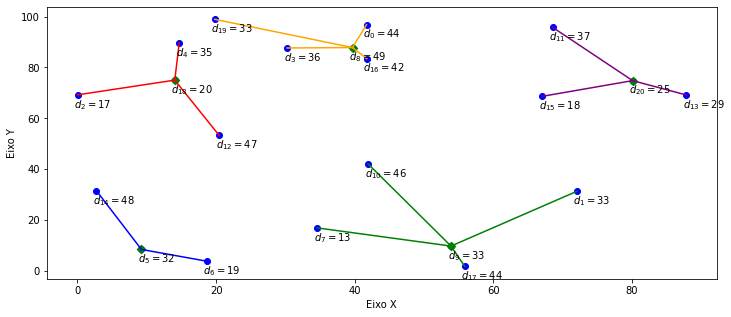

In [9]:
# grafico das soluções

plt.figure(figsize=(12,5))
plt.scatter(X,Y,color='blue')

for n in localizacoes_ativas:
    plt.scatter(X[n],Y[n],color='green',marker='D')
    
for i in range(len(X)):
    plt.annotate('$d_{%d} = %d$' %(i,demanda[i]), (X[i]-0.5, Y[i]-5))
              
for n in arcos_ativos:
    i = n[0]
    j = n[1]
    plt.plot([X[i],X[j]],[Y[i],Y[j]],
    color= Color[localizacoes_ativas.index(j)]
    )

plt.xlabel("Eixo X")
plt.ylabel("Eixo Y")
plt.show()